In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import itertools

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Unnamed: 0,PRODUCT,NOART,QTY,ENROUTE,MODE,AV3MT01,AV6MT01,POSPRO,Month,Sale,filename,LABO,Frequency,Product Type,Comments
0,43,BIPRETERAX 5MG/1.25MG TABS 30,86380,777,3500,2,535.0,546,0,2016-02-01,360,2016-02-24,139661,43,Anti-hypertensive,Available
1,44,BIPRETERAX 5MG/1.25MG TABS 30,86380,777,3500,2,535.0,546,0,2016-01-01,674,2016-02-24,139661,43,Anti-hypertensive,Available
2,45,BIPRETERAX 5MG/1.25MG TABS 30,86380,310,3500,2,499.0,507,0,2015-10-01,478,2016-03-29,139661,43,Anti-hypertensive,Available
3,46,BIPRETERAX 5MG/1.25MG TABS 30,86380,310,3500,2,499.0,507,0,2015-09-01,549,2016-03-29,139661,43,Anti-hypertensive,Available
4,47,BIPRETERAX 5MG/1.25MG TABS 30,86380,0,3450,7,453.0,494,0,2015-11-01,515,2016-05-26,139661,43,Anti-hypertensive,Available


In [3]:
new_data = data.pivot_table(index='Month', columns='PRODUCT', values='Sale')
new_data.columns.name = None
new_data.head()

,ACTAL TUMS BLISTER 100'S,ACTIFED DRY COUGH & COLD 100ML,ACTIFED WET COUGH & COLD 100ML,ACULAR 0.5% EYE DROPS 5ML C,ADACEL POLIO 1SSA +2NEEDLES A,ADIDAS DEEP EN DEO 150 FCA5424,ADIDAS DYN PUL DEO 150 FCA5421,ADIDAS ICE DIV DEO 150 FCA5420,ALBEN TABS 400MG 1'S,ALBENDOL 200MG TABS 2'S,...,ZESTORETIC TABS 20MG 28'S,ZINNAT SUSP 125MG/5ML 100ML,ZINNAT SUSP 125MG/5ML 50ML,ZINNAT SUSP 250MG/5ML 50ML,ZINNAT TABS 250MG 10'S,ZINNAT TABS 500MG 10'S,ZITHROMAX 500MG TABS 3'S,ZITHROMAX POS 200MG/5ML 15ML,ZITHROMAX POS 200MG/5ML 30ML,ZYRTEC 1MG/ML FL/75ML
Month,,,,,,,,,,,,,,,,,,,,,
2015-06-01,100.0,1344.0,745.0,214.0,172.0,0.0,0.0,1813.0,798.0,25.0,...,12.0,502.0,598.0,308.0,173.0,1089.0,5306.0,1294.0,325.0,1920.0
2015-07-01,936.0,6064.0,1881.0,128.0,183.0,1260.0,1469.0,1543.0,1043.0,0.0,...,19.0,371.0,508.0,409.0,158.0,795.0,4137.0,1626.0,581.0,1279.0
2015-08-01,112.0,1666.0,1072.0,259.0,145.0,910.0,1099.0,953.0,1699.0,14.0,...,40.0,1000.0,471.0,164.0,211.0,635.0,6644.0,1805.0,147.0,1683.0
2015-09-01,126.0,695.0,861.0,264.0,114.0,5147.0,5779.0,6859.0,964.0,180264.0,...,14.0,809.0,366.0,141.0,124.0,588.0,3684.0,1538.0,0.0,903.0
2015-10-01,113.0,1869.0,1061.0,210.0,173.0,0.0,0.0,0.0,839.0,2220.0,...,27.0,419.0,454.0,316.0,154.0,801.0,759.0,0.0,167.0,1542.0


In [4]:
date = new_data.index.values

## Time series forecasting with ARIMA

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
param_search = {}

In [24]:
def parameter_search(name):
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(new_data[name].resample('MS').mean(),
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
    #             param_search['ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal)] = results.aic
#                 print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                key = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)
                param_search[key] = results.aic
            except:
                continue
    return param_search

In [25]:
parameter_search("ACTAL TUMS BLISTER 100'S")

C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\intel\anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum

{'ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:498.24650968039987': 498.24650968039987,
 'ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan': nan,
 'ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:327.1775522413988': 327.1775522413988,
 'ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:144.9087297584798': 144.9087297584798,
 'ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:329.7372779850015': 329.7372779850015,
 'ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan': nan,
 'ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:155.67474411873255': 155.67474411873255,
 'ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:146.775974474211': 146.775974474211,
 'ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:447.34515678225085': 447.34515678225085,
 'ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2036.4452306050014': 2036.4452306050014,
 'ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:295.92943439467734': 295.92943439467734,
 'ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:126.87706227528815': 126.87706227528815,
 'ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:325.6221981297825': 325.6221981297825,
 'ARIMA(0, 0, 1)x(1, 0, 1, 12)12

In [26]:
param_search = parameter_search("ACTAL TUMS BLISTER 100'S")

C:\Users\intel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\intel\anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\intel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1027: RuntimeWarning: invalid value encountered in less
  params_variance = np.atleast_1d(max(np.array(params_variance), 1e-10))
C:\Users\intel\anaconda\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\intel\anaconda\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\intel\anaconda\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in grea

In [27]:
param_search

{'ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:498.24650968039987': 498.24650968039987,
 'ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan': nan,
 'ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:327.1775522413988': 327.1775522413988,
 'ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:144.9087297584798': 144.9087297584798,
 'ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:329.7372779850015': 329.7372779850015,
 'ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan': nan,
 'ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:155.67474411873255': 155.67474411873255,
 'ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:146.775974474211': 146.775974474211,
 'ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:447.34515678225085': 447.34515678225085,
 'ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2036.4452306050014': 2036.4452306050014,
 'ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:295.92943439467734': 295.92943439467734,
 'ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:126.87706227528815': 126.87706227528815,
 'ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:325.6221981297825': 325.6221981297825,
 'ARIMA(0, 0, 1)x(1, 0, 1, 12)12

In [28]:
def min_AIC(dictionary):
    key_min = min(param_search.keys(), key=(lambda k: param_search[k]))
    orders = tuple(map(int, key_min[6:13].split(', ')))
    season = tuple(map(int, key_min[16:27].split(', ')))
    
    return orders, season

In [29]:
orders, season = min_AIC(param_search)
print(orders, season)

(1, 1, 1) (1, 1, 1, 12)


In [33]:
def fit_model(name):
    orders, season = min_AIC(param_search)
    mod = sm.tsa.statespace.SARIMAX(new_data[name].resample('MS').mean(),
                                order=orders,
                                seasonal_order=season,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    
    return results

In [34]:
fit_model("ACTAL TUMS BLISTER 100'S")

C:\Users\intel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [43]:
def validate_forecast(name):
    results = fit_model(name)
    pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
    pred_ci = pred.conf_int()
    y=new_data[name].resample('MS').mean()
    ax = y['2015':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Drug Sales')
    plt.legend()
    plt.show()
    y_forecasted = pred.predicted_mean
    y_truth = y['2017-01-01':]

    # Compute the mean square error
    mse = ((y_forecasted - y_truth) ** 2).mean()
    rmse = round(np.sqrt(mse), 2)
    
    return mse, rmse

C:\Users\intel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


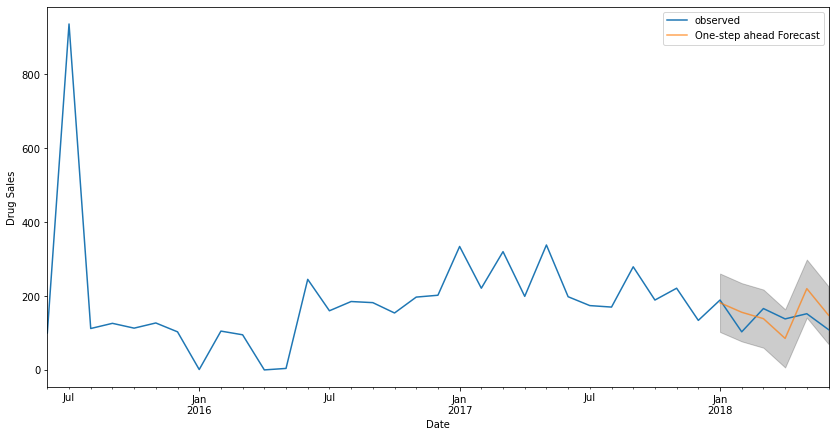

(2087.719786487443, 45.69)

In [44]:
validate_forecast("ACTAL TUMS BLISTER 100'S")

In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.


Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 45.69 of the real sales-this is a pretty good model so far.

In [53]:
def predictions(name):
    results = fit_model(name)
    pred_uc = results.get_forecast(steps=10)
    pred_ci = pred_uc.conf_int()
    
    y = new_data[name]
    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Drug Sales')

    plt.legend()
    plt.show()
    
    pred_values = pred_uc.predicted_mean
    predict_df = pd.DataFrame(pred_values)
    predict_df.columns = ['Prediction']
    
    return predict_df

C:\Users\intel\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


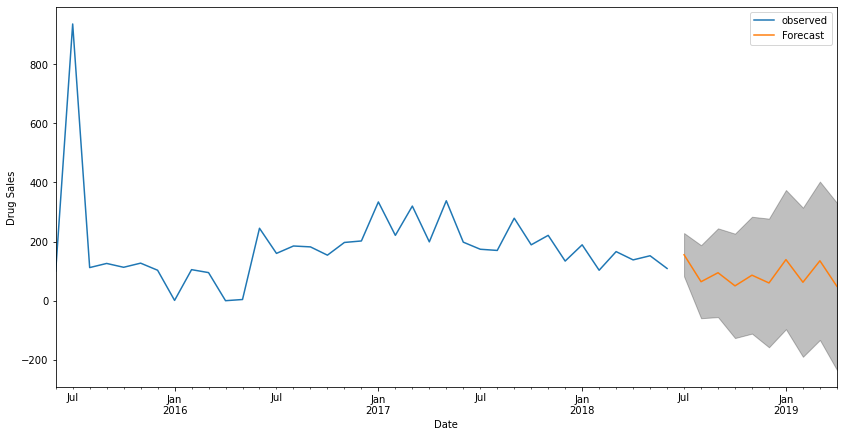

,Prediction
2018-07-01,155.342433
2018-08-01,64.207217
2018-09-01,94.568099
2018-10-01,50.160748
2018-11-01,86.270594
2018-12-01,59.967935
2019-01-01,138.983058
2019-02-01,62.413266
2019-03-01,134.993501
2019-04-01,48.549985


In [54]:
predictions("ACTAL TUMS BLISTER 100'S")